<a href="https://colab.research.google.com/github/sayu0303/FCE_EQ_2025/blob/main/P2_FCE_MIRELLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SEGUNDA AVALIAÇÃO**
##Fundamentos Computacionais para Engenharia
---

###**Data:** 22/07
###**Professor:** Julio Cesar Sampaio Dutra
###**Nome:** Mirella Sayuri Ferreira Buto
###**Matrícula:** 2021101274

##**PARTE 1 - CONCEITOS FUNDAMENTAIS (TEORIA E COMPREENSÃO)**



##**QUESTÃO 1**

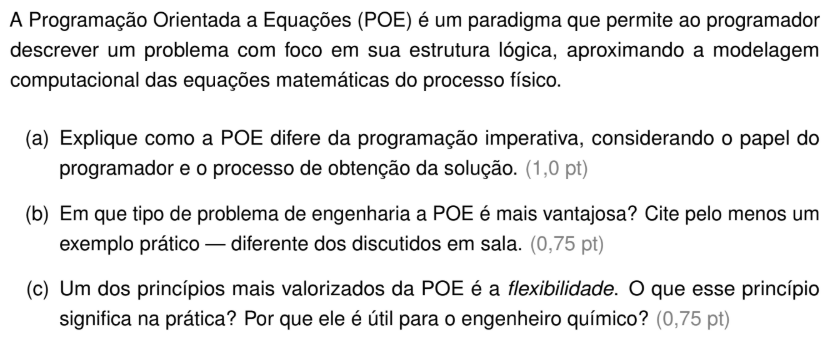

###a)
A Programação Orientada a Equações (POE) tem como foco "o que deve ser resolvido", onde o programador modela e especifica as relações entre as variáveis de maneira algébrica ou por sistema lineares, descrevendo o problema é e deixando que o resolvedor determine a solução. Por outro lado, a Programação Imperativa foca em "como resolver o problema", onde o programador define uma sequência de comandos explícita para resolução do problema.

###b)
A Programação Orientada a Equações é vantajosa em problemas de engenharia que envolvam relações matemáticas complexas, em vez de instruções sequenciais, para resolução simultânea de várias equações para otimizar e modelar um comportamento. Um exemplo prático é na simulação de processo de separação, a fim de otimizar as configurações operacionais e prever o desempenho das colunas de destilação, absorvedores ou extratores.

###c)
A flexibilidade na POE significa que o conjunto de equações pode ser resolvido para diferentes variáveis. Dessa forma, permitindo modificar os valores das variáveis aplicadas para realizar simulações, otimizações, ou estimação de parâmetros em um único código. Além disso, facilita na edição do código, permitindo aplicar métodos distintos sem prejudicar a lógica da codificação.
Para o engenheiro químico, utilizar essa programação facilita na otimização do tempo e confiabilidade do método aplicado  para solucionar problemas, permitindo otimizar processos e melhorar a produção.

##**QUESTÃO 2**

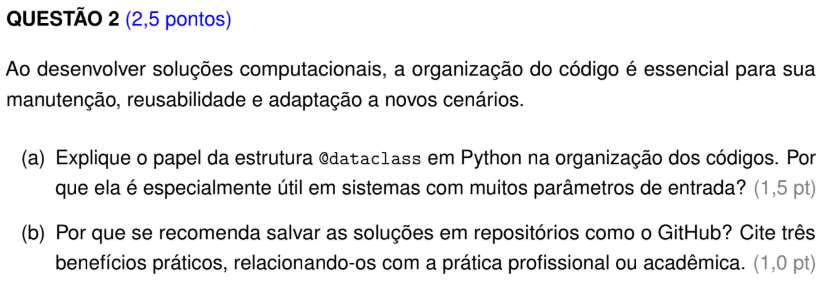

###a)
O papel do @dataclass é tornar a codificação mais simples, criando classes que armazenam variáveis relacionadas e evitando repetições ao decorrer do código. Além disso, otimiza a organização, tornando o código mais legível e fácil de corrigir.
Para sistemas com muitos parâmetros, é útil por permitir agrupar todos ao parâmetros em uma única estrutura, evitando erros e facilitando o manuseio de dados.

###b)
Se recomenda salvar as soluções em repositórios na plataforma GitHub para ter controle de versões na produção de um código. Além disso, o GitHub permite a reprodutibilidade dos códigos, para que outras pessoas apliquem e/ou testem o seu código; compartilhamento com colegas e professores, facilitando o acesso; e integração com notebooks de simulação.

##**PARTE 2 - APLICAÇÕES E LÓGICA COMPUTACIONAL**

##**QUESTÃO 3**


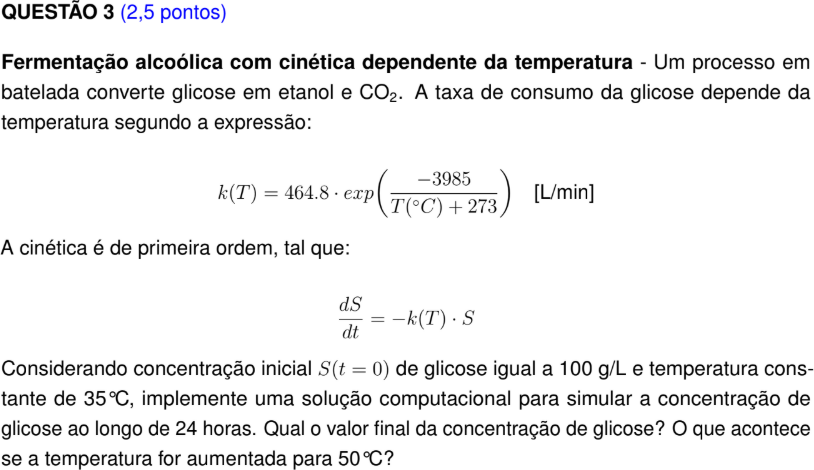

###a)

In [229]:
# Definição das bibliotecas a serem utilizadas

import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [230]:
# Definição das váriáveis a serem utilizadas no exercício no dataclass

@dataclass
class ParametrosFermentacao:

  S0: float = 100.0 # Concentração inicial (g/L)
  temperatura: float = 35.0 # Temperatura (°C)

In [231]:
# Definição das equações

def modelo_Fermentacao(t,S,parametros):

  '''
  Função que implementa o modelo de fermentação de glicose,
  calculando a taxa de consumo dessa glicose.

  t - tempo (min)
  S - concentração de glicose (g/L)

  '''

  temperatura = parametros.temperatura
  k = 464.8*np.exp(-3985/(temperatura + 273)) #Taxa de consumo da glicose (L/min)
  dSdt = -k*S

  return dSdt

def simulacao_Fermentacao(tempo, parametros):

  '''
  Função que simula o modelo de fermentação.

  '''

  S0 = parametros.S0
  teval = np.linspace(tempo[0],tempo[-1],100)
  sol = solve_ivp(modelo_Fermentacao, tempo, [S0], t_eval=teval, args=(parametros,), method = 'BDF')


  return sol.t, sol.y[0]

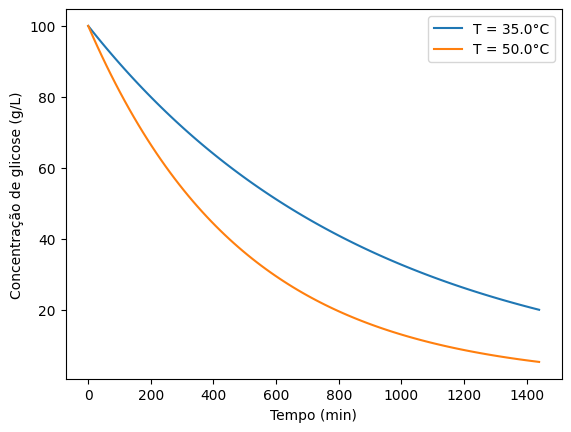

Valor final da concentração da glicose (T=35°C)= 20.005316568470313
Valor final da concentração da glicose (T=50°C)= 5.3104702903824865


In [232]:
# Aplicação da simulação do modelo de fermentação
tempo = [0,24*60] # Para utilizar o tempo em minutos
conjunto = [ParametrosFermentacao(),
            ParametrosFermentacao(temperatura=50.0)]


for parametros in conjunto:
  t ,S = simulacao_Fermentacao(tempo, parametros)
  conc.append(S[-1])  # O último elemento do vetor da minha concentração
  plt.plot(t,S, label = f'T = {parametros.temperatura}°C')

plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de glicose (g/L)')
plt.legend()
plt.show()

print(f'Valor final da concentração da glicose (T=35°C)= {conc[0]}')
print(f'Valor final da concentração da glicose (T=50°C)= {conc[-1]}')

##**QUESTÃO 4**

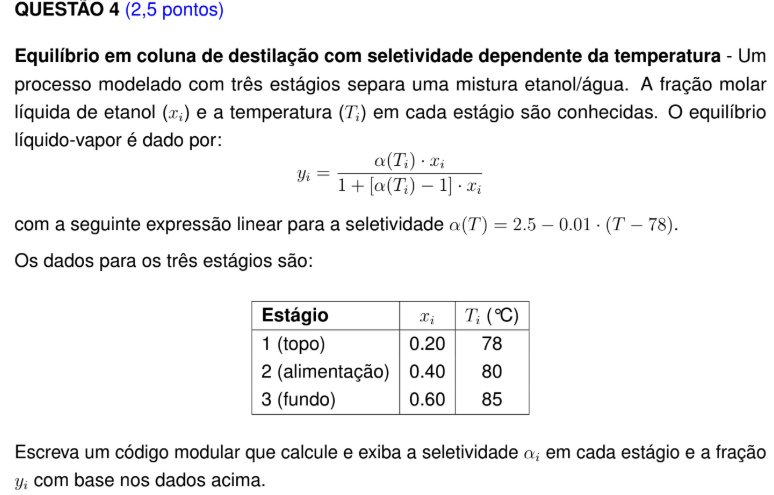


In [233]:
#Definição das bibliotecas utilizadas

from dataclasses import dataclass
import numpy as np

In [234]:
# Definição das váriáveis a serem utilizadas no exercício no dataclass

@dataclass
class ParametrosColuna:
  Ti: float # Temperatura no estágio i
  xi: float # Fração molar no estágio i

In [235]:
# Definição da equação e sua condições

def modeloColuna(parametros):

  Ti, xi = parametros.Ti, parametros.xi
  alfa = 2.5 - 0.01*(Ti-78) # Expressão linear para seletividade
  yi = (alfa*xi)/(1+(alfa-1)*xi)

  return alfa, yi

In [236]:
# Definição do conjunto de estágios

# Definir um contador para o estágio

contador = 0

conjunto = [ParametrosColuna(xi=0.2, Ti=78),
            ParametrosColuna(xi=0.4, Ti=80),
            ParametrosColuna(xi=0.6, Ti=85)]

for estagio in conjunto:
  alfa, yi = modeloColuna(estagio)
  contador += 1
  print(f'Estágio {contador} = ', f'alfa = {alfa}', f'y = {yi}')



Estágio 1 =  alfa = 2.5 y = 0.3846153846153846
Estágio 2 =  alfa = 2.48 y = 0.6231155778894472
Estágio 3 =  alfa = 2.43 y = 0.7847147470398277
